Importamos las librerías necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Cargamos un dataframe con el dataset de calidad de aire en New York

In [2]:
df = pd.read_csv('../Datasets/Air Quality/Air_Quality.csv')

Veamos información general del dataframe

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16218 entries, 0 to 16217
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       16218 non-null  int64  
 1   Indicator ID    16218 non-null  int64  
 2   Name            16218 non-null  object 
 3   Measure         16218 non-null  object 
 4   Measure Info    16218 non-null  object 
 5   Geo Type Name   16218 non-null  object 
 6   Geo Join ID     16218 non-null  int64  
 7   Geo Place Name  16218 non-null  object 
 8   Time Period     16218 non-null  object 
 9   Start_Date      16218 non-null  object 
 10  Data Value      16218 non-null  float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 1.5+ MB


Veamos las primeras lineas

In [4]:
df.head()

,Unique ID,Indicator ID,Name,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Data Value,Message
0,172653,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2011,12/01/2010,25.30,NaN
1,172585,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,203,Bedford Stuyvesant - Crown Heights,Annual Average 2009,12/01/2008,26.93,NaN
2,336637,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,204,East New York,Annual Average 2015,01/01/2015,19.09,NaN
3,336622,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,103,Fordham - Bronx Pk,Annual Average 2015,01/01/2015,19.76,NaN
4,172582,375,Nitrogen dioxide (NO2),Mean,ppb,UHF34,104,Pelham - Throgs Neck,Annual Average 2009,12/01/2008,22.83,NaN


Veamos si hay nulos:

In [5]:
df.isna().sum()

Unique ID             0
Indicator ID          0
Name                  0
Measure               0
Measure Info          0
Geo Type Name         0
Geo Join ID           0
Geo Place Name        0
Time Period           0
Start_Date            0
Data Value            0
Message           16218
dtype: int64

Vemos que la columna Message tiene todas las entradas nulas. <br>
Investiguemos si hay duplicados:

In [6]:
df.duplicated().sum()

0

Ahora veamos qué es lo que contiene cada columna. Comencemos por 'Name'.

In [7]:
df['Name'].unique()

array(['Nitrogen dioxide (NO2)', 'Fine particles (PM 2.5)', 'Ozone (O3)',
       'Asthma emergency department visits due to PM2.5',
       'Annual vehicle miles traveled',
       'Asthma hospitalizations due to Ozone',
       'Respiratory hospitalizations due to PM2.5 (age 20+)',
       'Boiler Emissions- Total SO2 Emissions',
       'Cardiovascular hospitalizations due to PM2.5 (age 40+)',
       'Boiler Emissions- Total PM2.5 Emissions',
       'Boiler Emissions- Total NOx Emissions',
       'Annual vehicle miles travelled (cars)',
       'Annual vehicle miles travelled (trucks)',
       'Cardiac and respiratory deaths due to Ozone',
       'Asthma emergency departments visits due to Ozone',
       'Outdoor Air Toxics - Formaldehyde',
       'Outdoor Air Toxics - Benzene', 'Deaths due to PM2.5'],
      dtype=object)

La columna 'Name' contiene el nombre de la variable en estudio. <br>
Cabe aclarar que la materia particulada o PM (por sus siglas en inglés) 2.5, son partículas muy pequeñas en el aire que tiene un diámetro de 2.5 micrómetros

Veamos ahora qué contiene la columna 'Measure'

In [8]:
df['Measure'].unique()

array(['Mean', 'Estimated annual rate (under age 18)', 'million miles',
       'Estimated annual rate (age 18+)', 'Estimated annual rate',
       'Number per km2', 'Annual average concentration',
       'Estimated annual rate (age 30+)'], dtype=object)

Como podemos observar, la columna 'Measure' contiene la descripción de en qué consiste la medida registrada.

In [9]:
df['Measure Info'].unique()

array(['ppb', 'mcg/m3', 'per 100,000 children', 'per km2',
       'per 100,000 adults', 'number', 'per 100,000', 'µg/m3'],
      dtype=object)

Por otro lado, la columna 'Measure Info' contiene las unidades de medición.

In [10]:
df['Geo Type Name'].unique()

array(['UHF34', 'UHF42', 'CD', 'Borough', 'Citywide'], dtype=object)

UHF34 y UHF42: <br>
Los vecindarios de United Hospital Fund (UHF) (34) constan de 34 zonas postales contiguas áreas de código con características similares. <br>
Los vecindarios de United Hospital Fund (UHF) (42) constan de 42 códigos postales contiguos áreas, designadas para aproximarse a los distritos de planificación comunitaria de la ciudad de Nueva York. <br>

CD: <br>
Se refiere a los distritos comunitarios (Community Districts en inglés), que son subdivisiones geográficas dentro de los cinco distritos principales de la ciudad de Nueva York. Los distritos comunitarios se utilizan para la planificación y el gobierno local.

Borough: <br> 
Se refiere a los distritos de la ciudad de Nueva York, también conocidos como boroughs en inglés. Nueva York está dividida en cinco distritos: Manhattan, Brooklyn, Queens, Bronx y Staten Island.

Citywide: <br> 
Se refiere a métricas que se aplican a toda la ciudad de Nueva York en su conjunto, en lugar de áreas específicas dentro de la ciudad.

In [11]:
df['Geo Place Name'].unique()

array(['Bedford Stuyvesant - Crown Heights', 'East New York',
       'Fordham - Bronx Pk', 'Pelham - Throgs Neck', 'Chelsea-Village',
       'Borough Park', 'High Bridge - Morrisania',
       'Bensonhurst - Bay Ridge', 'Coney Island - Sheepshead Bay',
       'Rockaways', 'Mott Haven and Melrose (CD1)',
       'Financial District (CD1)', 'Greenwich Village and Soho (CD2)',
       'Woodside and Sunnyside (CD2)', 'Greenpoint',
       'Kingsbridge - Riverdale', 'Northeast Bronx', 'West Queens',
       'Washington Heights', 'Hunts Point - Mott Haven',
       'East Flatbush - Flatbush', 'Canarsie - Flatlands',
       'Southwest Queens', 'Morrisania and Crotona (CD3)',
       'Lower East Side and Chinatown (CD3)',
       'Central Harlem - Morningside Heights',
       'Downtown - Heights - Slope', 'Bronx', 'Williamsburg - Bushwick',
       'Northern SI', 'Port Richmond', 'Upper East Side (CD8)',
       'Central Harlem (CD10)', 'Washington Heights and Inwood (CD12)',
       'Bay Ridge and Dyker

La columna 'Geo Place Name' contiene los nombres correspondientes a los CD, Boroughs o si se trata de la ciudad entera.

Veamos ahora la columna 'Time Period'

In [12]:
df['Time Period'].unique()

array(['Annual Average 2011', 'Annual Average 2009',
       'Annual Average 2015', 'Annual Average 2020', 'Winter 2010-11',
       'Annual Average 2013', 'Winter 2014-15', 'Annual Average 2021',
       'Summer 2009', 'Annual Average 2017', 'Winter 2009-10',
       'Summer 2017', 'Summer 2018', 'Winter 2018-19', 'Summer 2014',
       'Winter 2016-17', 'Annual Average 2014', 'Winter 2011-12',
       'Summer 2020', '2-Year Summer Average 2009-2010',
       'Annual Average 2016', 'Annual Average 2018', 'Summer 2013',
       'Summer 2021', 'Summer 2012', 'Winter 2008-09', 'Winter 2017-18',
       'Winter 2013-14', 'Annual Average 2019', 'Summer 2016',
       'Summer 2010', 'Winter 2020-21', 'Summer 2011', 'Winter 2015-16',
       'Summer 2015', 'Summer 2019', 'Winter 2019-20', '2012-2014',
       '2015-2017', 'Annual Average 2010', 'Winter 2012-13', '2009-2011',
       '2016', '2005', '2005-2007', 'Annual Average 2012', '2015', '2013',
       '2011', '2014'], dtype=object)

Como podemos observar, los registros de esta columna contienen el período de tiempo al que hace referencia la medición. <br>
A su vez, la columna 'Start_Date' contiene la fecha inicial de la medición.

In [13]:
df['Start_Date'].unique()

array(['12/01/2010', '12/01/2008', '01/01/2015', '01/01/2020',
       '12/01/2012', '12/01/2014', '01/01/2021', '06/01/2009',
       '01/01/2017', '12/01/2009', '06/01/2017', '06/01/2018',
       '12/01/2018', '06/01/2014', '12/01/2016', '12/01/2013',
       '12/01/2011', '06/01/2020', '12/31/2015', '01/01/2018',
       '06/01/2013', '06/01/2021', '06/01/2012', '12/01/2017',
       '01/01/2019', '06/01/2016', '06/01/2010', '12/01/2020',
       '06/01/2011', '12/01/2015', '06/01/2015', '06/01/2019',
       '12/01/2019', '01/02/2012', '01/01/2009', '01/01/2016',
       '01/01/2005', '01/01/2013', '01/01/2011', '01/01/2014'],
      dtype=object)

Vamos a quedarnos únicamente con los datos correspondientes a New York City, es decir, la ciudad entera.

In [14]:
df = df[df['Geo Place Name'] == 'New York City']
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 12077 to 15480
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unique ID       150 non-null    int64  
 1   Indicator ID    150 non-null    int64  
 2   Name            150 non-null    object 
 3   Measure         150 non-null    object 
 4   Measure Info    150 non-null    object 
 5   Geo Type Name   150 non-null    object 
 6   Geo Join ID     150 non-null    int64  
 7   Geo Place Name  150 non-null    object 
 8   Time Period     150 non-null    object 
 9   Start_Date      150 non-null    object 
 10  Data Value      150 non-null    float64
 11  Message         0 non-null      float64
dtypes: float64(2), int64(3), object(7)
memory usage: 15.2+ KB


Ahora, para poder analizar mejor las variables, coloquemos las los valores de la columna 'Name' como columnas separadas:

In [15]:
pivot_df = df.pivot_table(index=['Unique ID', 'Indicator ID', 'Measure', 'Measure Info',
                                 'Geo Type Name', 'Geo Join ID', 'Geo Place Name',
                                 'Time Period', 'Start_Date'],
                          columns='Name',
                          values='Data Value').reset_index()
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               150 non-null    int64  
 1   Indicator ID                                            150 non-null    int64  
 2   Measure                                                 150 non-null    object 
 3   Measure Info                                            150 non-null    object 
 4   Geo Type Name                                           150 non-null    object 
 5   Geo Join ID                                             150 non-null    int64  
 6   Geo Place Name                                          150 non-null    object 
 7   Time Period                                             150 non-null    object 
 8   Start_Date                              

En la siguiente celda, configuramos pandas para que muestre todas las columnas en Jupyter Notebook

In [16]:
pd.set_option('display.max_columns', None)

In [17]:
pivot_df.head()

Name,Unique ID,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Annual vehicle miles traveled,Annual vehicle miles travelled (cars),Annual vehicle miles travelled (trucks),Asthma emergency department visits due to PM2.5,Asthma emergency departments visits due to Ozone,Asthma hospitalizations due to Ozone,Boiler Emissions- Total NOx Emissions,Boiler Emissions- Total PM2.5 Emissions,Boiler Emissions- Total SO2 Emissions,Cardiac and respiratory deaths due to Ozone,Cardiovascular hospitalizations due to PM2.5 (age 40+),Deaths due to PM2.5,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Outdoor Air Toxics - Benzene,Outdoor Air Toxics - Formaldehyde,Ozone (O3),Respiratory hospitalizations due to PM2.5 (age 20+)
0,130439,640,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,130487,641,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,130535,642,Number per km2,number,Citywide,1,New York City,2013,01/01/2013,NaN,NaN,NaN,NaN,NaN,NaN,29.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,130727,646,Annual average concentration,µg/m3,Citywide,1,New York City,2005,01/01/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.9,NaN,NaN,NaN
4,130775,647,Annual average concentration,µg/m3,Citywide,1,New York City,2005,01/01/2005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.2,NaN,NaN


Comfiguremos también para que muestre la totalidad de las filas

In [18]:
pd.set_option('display.max_rows', None)

Veamos por ejemplo los datos de 'Asthma emergency department visits due to PM2.5'

In [19]:
pivot_df[['Measure', 'Measure Info', 'Time Period', 'Asthma emergency department visits due to PM2.5']]

Name,Measure,Measure Info,Time Period,Asthma emergency department visits due to PM2.5
0,Number per km2,number,2013,NaN
1,Number per km2,number,2013,NaN
2,Number per km2,number,2013,NaN
3,Annual average concentration,µg/m3,2005,NaN
4,Annual average concentration,µg/m3,2005,NaN
5,Estimated annual rate (age 30+),"per 100,000 adults",2005-2007,NaN
6,Estimated annual rate (under age 18),"per 100,000 children",2005-2007,126.3
7,Estimated annual rate,"per 100,000 adults",2005-2007,NaN
8,Estimated annual rate,"per 100,000 adults",2005-2007,NaN
9,Estimated annual rate,"per 100,000",2005-2007,NaN


Vemos que los períodos de tiempo que contienen datos son bianuales en este caso.

En la siguiente celda quitamos la discriminación por edad en la columna 'Measure'

In [20]:
pivot_df = pivot_df[pivot_df['Measure'].isin(['Number per km2', 'Annual average concentration', 'Estimated annual rate', 'Mean', 'million miles'])]
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 149
Data columns (total 27 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               122 non-null    int64  
 1   Indicator ID                                            122 non-null    int64  
 2   Measure                                                 122 non-null    object 
 3   Measure Info                                            122 non-null    object 
 4   Geo Type Name                                           122 non-null    object 
 5   Geo Join ID                                             122 non-null    int64  
 6   Geo Place Name                                          122 non-null    object 
 7   Time Period                                             122 non-null    object 
 8   Start_Date                                   

Quitemos columnas que tienen todos nulos

In [21]:
pivot_df.dropna(axis=1, how='all', inplace=True)
pivot_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 122 entries, 0 to 149
Data columns (total 23 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Unique ID                                               122 non-null    int64  
 1   Indicator ID                                            122 non-null    int64  
 2   Measure                                                 122 non-null    object 
 3   Measure Info                                            122 non-null    object 
 4   Geo Type Name                                           122 non-null    object 
 5   Geo Join ID                                             122 non-null    int64  
 6   Geo Place Name                                          122 non-null    object 
 7   Time Period                                             122 non-null    object 
 8   Start_Date                                   

Ahora generamos un nuevo dataframe que tiene los datos solamente de 'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)'.

In [22]:
df_red = pivot_df[['Time Period', 'Measure', 'Measure Info', 'Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']]
df_red

Name,Time Period,Measure,Measure Info,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
0,2013,Number per km2,number,NaN,NaN,NaN
1,2013,Number per km2,number,NaN,NaN,NaN
2,2013,Number per km2,number,NaN,NaN,NaN
3,2005,Annual average concentration,µg/m3,NaN,NaN,NaN
4,2005,Annual average concentration,µg/m3,NaN,NaN,NaN
7,2005-2007,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN
8,2005-2007,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN
9,2005-2007,Estimated annual rate,"per 100,000",NaN,NaN,NaN
17,2009-2011,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN
18,2009-2011,Estimated annual rate,"per 100,000 adults",NaN,NaN,NaN


Quitamos las filas que contienen el 50% o más de valores nulos (es decir, las tres variables nulas)

In [23]:
null_ratio = df_red.isnull().sum(axis=1) / len(df_red.columns)

threshold = 0.5
df_cleaned = df_red[null_ratio < threshold]

df_cleaned.head()

Name,Time Period,Measure,Measure Info,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
20,2-Year Summer Average 2009-2010,Mean,ppb,NaN,NaN,28.1
29,Winter 2008-09,Mean,ppb,NaN,27.92,NaN
30,Winter 2009-10,Mean,ppb,NaN,24.77,NaN
31,Winter 2010-11,Mean,ppb,NaN,28.07,NaN
32,Winter 2011-12,Mean,ppb,NaN,22.54,NaN


Ahora seleccionamos los periodos que son promedio anual

In [24]:
df_cleaned = df_cleaned[df_cleaned['Time Period'].isin(['Annual Average 2009', 'Annual Average 2010', 'Annual Average 2011', 'Annual Average 2012',
                                                        'Annual Average 2013', 'Annual Average 2014', 'Annual Average 2015', 'Annual Average 2016',
                                                        'Annual Average 2017', 'Annual Average 2018', 'Annual Average 2019', 'Annual Average 2020', 
                                                        'Annual Average 2021'])]

df_cleaned

Name,Time Period,Measure,Measure Info,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
39,Annual Average 2009,Mean,ppb,NaN,22.72,NaN
40,Annual Average 2010,Mean,ppb,NaN,21.11,NaN
41,Annual Average 2011,Mean,ppb,NaN,21.58,NaN
42,Annual Average 2012,Mean,ppb,NaN,19.58,NaN
43,Annual Average 2013,Mean,ppb,NaN,18.83,NaN
54,Annual Average 2009,Mean,mcg/m3,10.43,NaN,NaN
55,Annual Average 2010,Mean,mcg/m3,9.54,NaN,NaN
56,Annual Average 2011,Mean,mcg/m3,10.10,NaN,NaN
57,Annual Average 2012,Mean,mcg/m3,8.95,NaN,NaN
58,Annual Average 2013,Mean,mcg/m3,8.63,NaN,NaN


Agrupamos por año:

In [25]:
df_grouped = df_cleaned.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()
df_grouped

Name,Time Period,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
0,Annual Average 2009,10.43,22.72,NaN
1,Annual Average 2010,9.54,21.11,NaN
2,Annual Average 2011,10.10,21.58,NaN
3,Annual Average 2012,8.95,19.58,NaN
4,Annual Average 2013,8.63,18.83,NaN
5,Annual Average 2014,8.93,18.89,NaN
6,Annual Average 2015,8.56,18.40,NaN
7,Annual Average 2016,7.45,17.58,NaN
8,Annual Average 2017,7.38,17.77,NaN
9,Annual Average 2018,7.00,17.00,NaN


Vemos que no hay datos de ozono, por lo que eliminamos la columna

In [26]:
df_grouped.drop(columns='Ozone (O3)', inplace=True)

Modificamos la columna 'Time Period' para eliminar 'Annual Average'

In [27]:
df_grouped['Time Period'] = df_grouped['Time Period'].str.extract(r'(\d{4})')
df_grouped

Name,Time Period,Fine particles (PM 2.5),Nitrogen dioxide (NO2)
0,2009,10.43,22.72
1,2010,9.54,21.11
2,2011,10.10,21.58
3,2012,8.95,19.58
4,2013,8.63,18.83
5,2014,8.93,18.89
6,2015,8.56,18.40
7,2016,7.45,17.58
8,2017,7.38,17.77
9,2018,7.00,17.00


Pasamos la columna 'Time Period' a tipo de dato entero

In [28]:
df_grouped['Time Period'] = df_grouped['Time Period'].astype(int)

Graficamos ahora la variación de estos contaminantes a lo largo de los años

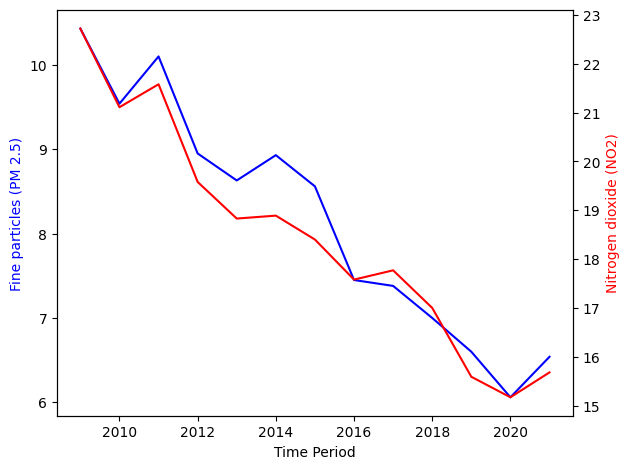

In [32]:
fig, ax1 = plt.subplots()

sns.lineplot(data=df_grouped, x='Time Period', y='Fine particles (PM 2.5)', color='blue', ax=ax1)
ax1.set_ylabel('Fine particles (PM 2.5)', color='blue')

ax2 = ax1.twinx()
sns.lineplot(data=df_grouped, x='Time Period', y='Nitrogen dioxide (NO2)', color='red', ax=ax2)
ax2.set_ylabel('Nitrogen dioxide (NO2)', color='red')

plt.tight_layout()

plt.show()

Como podemos ver, hay una clara tendencia a la disminución en la cantidad de Dióxido de Nitrógeno y de finas partículas a lo largo del tiempo. Además, esta reducción parece estar muy correlacionada.

Veamos el nivel de correlación entre estas dos variables, en la siguiente gráfica:

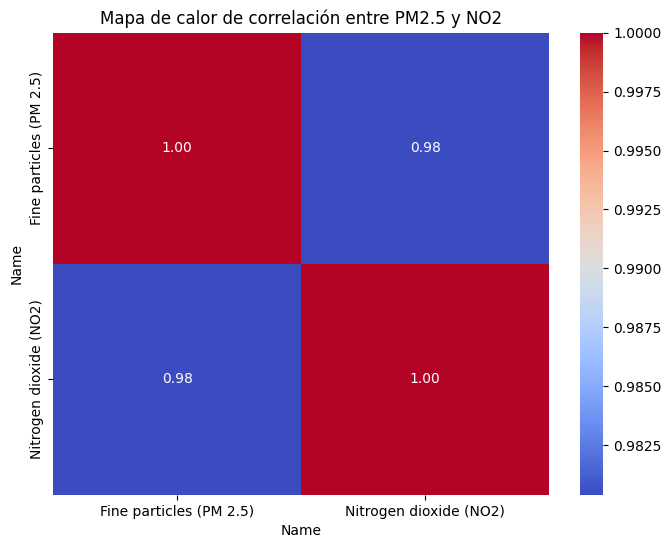

In [30]:
correlation_matrix = df_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5 y NO2')
plt.show()

Prácticamente una correlación perfecta entre NO2 y PM2.5

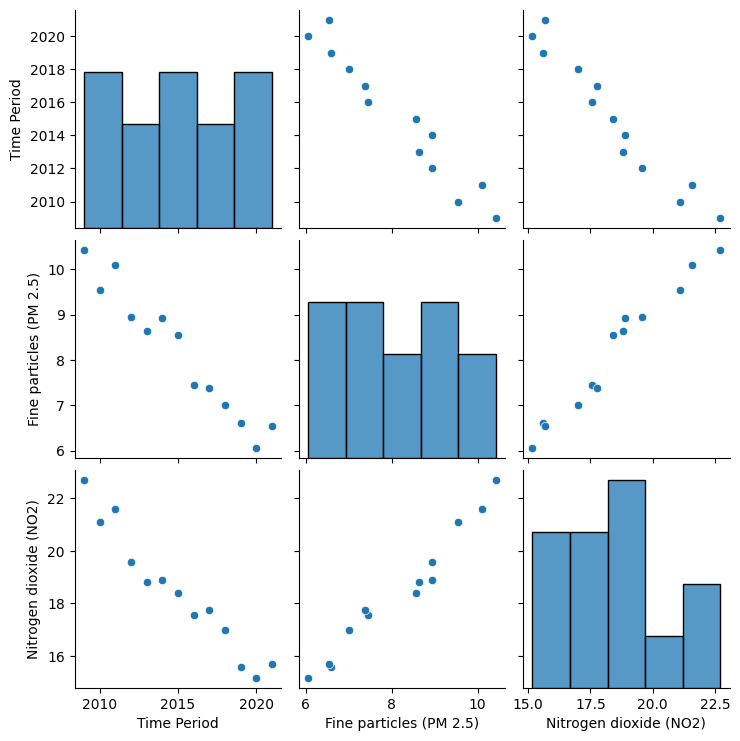

In [31]:
sns.pairplot(df_grouped)

En el pairplot anterior, observamos de forma clara esta correlación.

Analicemos ahora estas variables en cada Borough por separado. Para ello cargamos nuevamente los datos originales:

In [44]:
df = pd.read_csv('../Datasets/Air Quality/Air_Quality.csv')

Veamos los nombres de los Boroughs

In [43]:
df[df['Geo Type Name'].isin(['Borough'])]['Geo Place Name'].unique()

array(['Bronx', 'Brooklyn', 'Staten Island', 'Queens', 'Manhattan'],
      dtype=object)

Pivotamos el dataframe:

In [45]:
df = df.pivot_table(index=['Unique ID', 'Indicator ID', 'Measure', 'Measure Info',
                                 'Geo Type Name', 'Geo Join ID', 'Geo Place Name',
                                 'Time Period', 'Start_Date'],
                          columns='Name',
                          values='Data Value').reset_index()
df.head()

Name,Unique ID,Indicator ID,Measure,Measure Info,Geo Type Name,Geo Join ID,Geo Place Name,Time Period,Start_Date,Annual vehicle miles traveled,Annual vehicle miles travelled (cars),Annual vehicle miles travelled (trucks),Asthma emergency department visits due to PM2.5,Asthma emergency departments visits due to Ozone,Asthma hospitalizations due to Ozone,Boiler Emissions- Total NOx Emissions,Boiler Emissions- Total PM2.5 Emissions,Boiler Emissions- Total SO2 Emissions,Cardiac and respiratory deaths due to Ozone,Cardiovascular hospitalizations due to PM2.5 (age 40+),Deaths due to PM2.5,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Outdoor Air Toxics - Benzene,Outdoor Air Toxics - Formaldehyde,Ozone (O3),Respiratory hospitalizations due to PM2.5 (age 20+)
0,121644,386,Mean,ppb,CD,101,Financial District (CD1),2-Year Summer Average 2009-2010,06/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.87,NaN
1,121645,386,Mean,ppb,CD,102,Greenwich Village and Soho (CD2),2-Year Summer Average 2009-2010,06/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.68,NaN
2,121646,386,Mean,ppb,CD,103,Lower East Side and Chinatown (CD3),2-Year Summer Average 2009-2010,06/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.36,NaN
3,121647,386,Mean,ppb,CD,104,Clinton and Chelsea (CD4),2-Year Summer Average 2009-2010,06/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.15,NaN
4,121648,386,Mean,ppb,CD,105,Midtown (CD5),2-Year Summer Average 2009-2010,06/01/2009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.77,NaN


Generemos un dataframe para cada uno, quedándonos solo con las variables de interés:

In [48]:
variables = ['Measure', 'Measure Info', 'Time Period', 'Annual vehicle miles traveled', 'Fine particles (PM 2.5)' ,'Nitrogen dioxide (NO2)', 'Ozone (O3)']
df_bronx = df[df['Geo Place Name'] == 'Bronx'][variables]
df_brooklyn = df[df['Geo Place Name'] == 'Brooklyn'][variables]
df_staten = df[df['Geo Place Name'] == 'Staten Island'][variables]
df_queens = df[df['Geo Place Name'] == 'Queens'][variables]
df_manhattan = df[df['Geo Place Name'] == 'Manhattan'][variables]

In [49]:
df_bronx.head()

Name,Measure,Measure Info,Time Period,Annual vehicle miles traveled,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
220,Number per km2,number,2013,NaN,NaN,NaN,NaN
268,Number per km2,number,2013,NaN,NaN,NaN,NaN
316,Number per km2,number,2013,NaN,NaN,NaN,NaN
364,Annual average concentration,µg/m3,2005,NaN,NaN,NaN,NaN
412,Annual average concentration,µg/m3,2005,NaN,NaN,NaN,NaN


In [54]:
df_bronx.info()

<class 'pandas.core.frame.DataFrame'>
Index: 148 entries, 220 to 16212
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Measure                        148 non-null    object 
 1   Measure Info                   148 non-null    object 
 2   Time Period                    148 non-null    object 
 3   Annual vehicle miles traveled  1 non-null      float64
 4   Fine particles (PM 2.5)        39 non-null     float64
 5   Nitrogen dioxide (NO2)         39 non-null     float64
 6   Ozone (O3)                     14 non-null     float64
dtypes: float64(4), object(3)
memory usage: 9.2+ KB


Vemos que de Annual vehicle miles traveled tenemos solo un dato:

In [53]:
df_bronx[~df_bronx['Annual vehicle miles traveled'].isna()]

Name,Measure,Measure Info,Time Period,Annual vehicle miles traveled,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
8039,million miles,per km2,2016,24.0,NaN,NaN,NaN


Por lo tanto eliminamos la columna, y como no vamos a poder comparar entre Boroughs, la eliminamos de todos los dataframes:

In [57]:
df_bronx = df_bronx.drop(columns='Annual vehicle miles traveled')
df_brooklyn = df_brooklyn.drop(columns='Annual vehicle miles traveled')
df_staten = df_staten.drop(columns='Annual vehicle miles traveled')
df_queens = df_queens.drop(columns='Annual vehicle miles traveled')
df_manhattan = df_manhattan.drop(columns='Annual vehicle miles traveled')

Analicemos el caso de la columna ozono:

In [58]:
df_bronx[~df_bronx['Ozone (O3)'].isna()]

Name,Measure,Measure Info,Time Period,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
1096,Mean,ppb,2-Year Summer Average 2009-2010,NaN,NaN,23.70
7232,Mean,ppb,Summer 2009,NaN,NaN,25.30
7233,Mean,ppb,Summer 2010,NaN,NaN,33.16
7234,Mean,ppb,Summer 2011,NaN,NaN,32.91
7235,Mean,ppb,Summer 2012,NaN,NaN,34.61
7236,Mean,ppb,Summer 2013,NaN,NaN,31.25
7237,Mean,ppb,Summer 2014,NaN,NaN,31.15
9099,Mean,ppb,Summer 2015,NaN,NaN,30.39
9663,Mean,ppb,Summer 2016,NaN,NaN,33.09
11130,Mean,ppb,Summer 2017,NaN,NaN,28.85


In [59]:
df_brooklyn[~df_brooklyn['Ozone (O3)'].isna()]

Name,Measure,Measure Info,Time Period,Fine particles (PM 2.5),Nitrogen dioxide (NO2),Ozone (O3)
1097,Mean,ppb,2-Year Summer Average 2009-2010,NaN,NaN,28.00
7238,Mean,ppb,Summer 2009,NaN,NaN,26.27
7239,Mean,ppb,Summer 2010,NaN,NaN,33.83
7240,Mean,ppb,Summer 2011,NaN,NaN,33.19
7241,Mean,ppb,Summer 2012,NaN,NaN,33.89
7242,Mean,ppb,Summer 2013,NaN,NaN,31.13
7243,Mean,ppb,Summer 2014,NaN,NaN,31.29
9100,Mean,ppb,Summer 2015,NaN,NaN,32.48
9664,Mean,ppb,Summer 2016,NaN,NaN,33.98
11131,Mean,ppb,Summer 2017,NaN,NaN,30.26


Vemos que ozono se mide en verano, podemos cambiar el nombre Summer XXXX a XXXX para poder correlacionar con el resto de las variables.

In [62]:
df_bronx['Time Period'] = df_bronx['Time Period'].str.extract(r'(\d{4})').astype(int)
df_brooklyn['Time Period'] = df_brooklyn['Time Period'].str.extract(r'(\d{4})').astype(int)
df_staten['Time Period'] = df_staten['Time Period'].str.extract(r'(\d{4})').astype(int)
df_queens['Time Period'] = df_queens['Time Period'].str.extract(r'(\d{4})').astype(int)
df_manhattan['Time Period'] = df_manhattan['Time Period'].str.extract(r'(\d{4})').astype(int)

Eliminemos las filas con más (o igual) de 50% nulos

In [64]:
threshold = 0.5
null_ratio = df_bronx.isnull().sum(axis=1) / len(df_bronx.columns)
df_bronx = df_bronx[null_ratio < threshold]
null_ratio = df_brooklyn.isnull().sum(axis=1) / len(df_brooklyn.columns)
df_brooklyn = df_brooklyn[null_ratio < threshold]
null_ratio = df_staten.isnull().sum(axis=1) / len(df_staten.columns)
df_staten = df_staten[null_ratio < threshold]
null_ratio = df_queens.isnull().sum(axis=1) / len(df_queens.columns)
df_queens = df_queens[null_ratio < threshold]
null_ratio = df_manhattan.isnull().sum(axis=1) / len(df_manhattan.columns)
df_manhattan = df_manhattan[null_ratio < threshold]

Veamos como se comparan los diferentes Boroughs

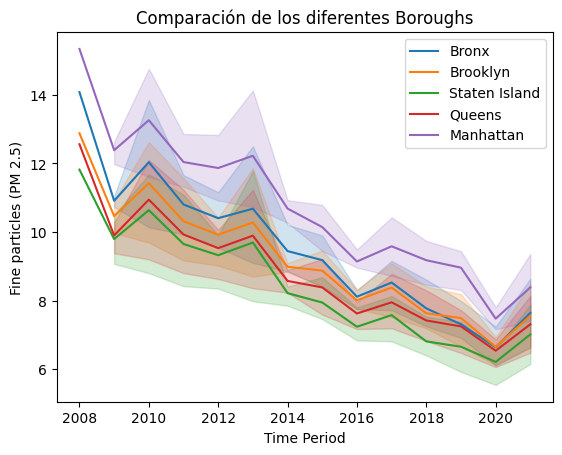

In [67]:
sns.lineplot(data=df_bronx, x= 'Time Period', y= 'Fine particles (PM 2.5)', label='Bronx')
sns.lineplot(data=df_brooklyn, x= 'Time Period', y= 'Fine particles (PM 2.5)', label= 'Brooklyn')
sns.lineplot(data=df_staten, x= 'Time Period', y= 'Fine particles (PM 2.5)', label= 'Staten Island')
sns.lineplot(data=df_queens, x= 'Time Period', y= 'Fine particles (PM 2.5)', label= 'Queens')
sns.lineplot(data=df_manhattan, x= 'Time Period', y= 'Fine particles (PM 2.5)', label= 'Manhattan')
plt.title('Comparación de los diferentes Boroughs')
plt.legend()
plt.show()

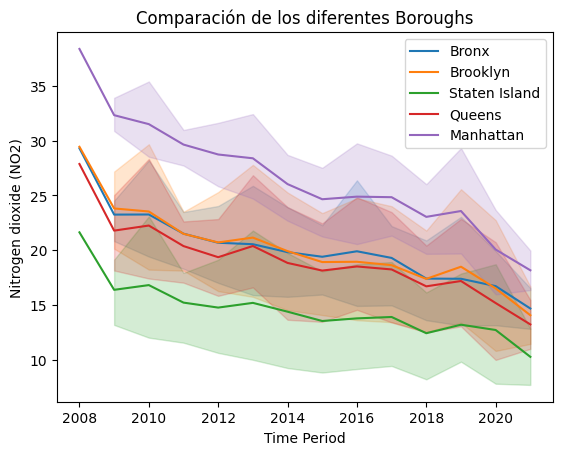

In [68]:
sns.lineplot(data=df_bronx, x= 'Time Period', y= 'Nitrogen dioxide (NO2)', label='Bronx')
sns.lineplot(data=df_brooklyn, x= 'Time Period', y= 'Nitrogen dioxide (NO2)', label= 'Brooklyn')
sns.lineplot(data=df_staten, x= 'Time Period', y= 'Nitrogen dioxide (NO2)', label= 'Staten Island')
sns.lineplot(data=df_queens, x= 'Time Period', y= 'Nitrogen dioxide (NO2)', label= 'Queens')
sns.lineplot(data=df_manhattan, x= 'Time Period', y= 'Nitrogen dioxide (NO2)', label= 'Manhattan')
plt.title('Comparación de los diferentes Boroughs')
plt.legend()
plt.show()

En el caso de NO2 y PM2.5 se observa una tendencia a la baja a través de los años, siendo Manhattan el Borough con menor calidad de aire, y Staten Island el de mayor calidad de aire

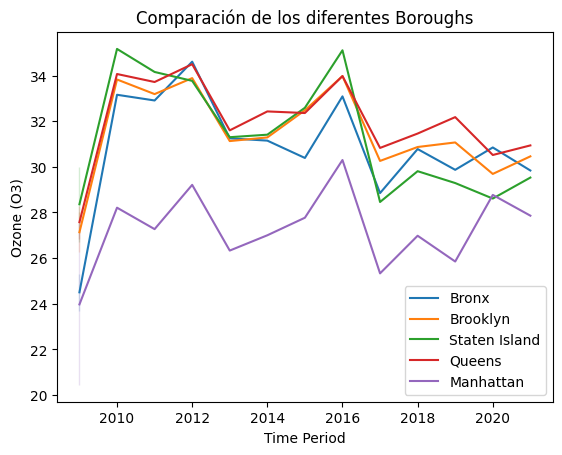

In [69]:
sns.lineplot(data=df_bronx, x= 'Time Period', y= 'Ozone (O3)', label='Bronx')
sns.lineplot(data=df_brooklyn, x= 'Time Period', y= 'Ozone (O3)', label= 'Brooklyn')
sns.lineplot(data=df_staten, x= 'Time Period', y= 'Ozone (O3)', label= 'Staten Island')
sns.lineplot(data=df_queens, x= 'Time Period', y= 'Ozone (O3)', label= 'Queens')
sns.lineplot(data=df_manhattan, x= 'Time Period', y= 'Ozone (O3)', label= 'Manhattan')
plt.title('Comparación de los diferentes Boroughs')
plt.legend()
plt.show()

En el caso de Ozono, no podemos ver una tendencia muy clara. Manhattan parece mantenerse prácticamente constante. El resto parece tender a bajar la cantidad de Ozono en el aire. Sin embargo en este caso, Manhattan es el Borough con menor cantidad de Ozono.

Antes de hacer el Pairplot para ver las correlaciones, debemos agrupar los datos:

In [71]:
df_bronx_grouped = df_bronx.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()
df_brooklyn_grouped = df_brooklyn.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()
df_staten_grouped = df_staten.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()
df_queens_grouped = df_queens.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()
df_manhattan_grouped = df_manhattan.groupby('Time Period').agg({'Fine particles (PM 2.5)': 'max',
                                                    'Nitrogen dioxide (NO2)': 'max',
                                                    'Ozone (O3)': 'max' }).reset_index()

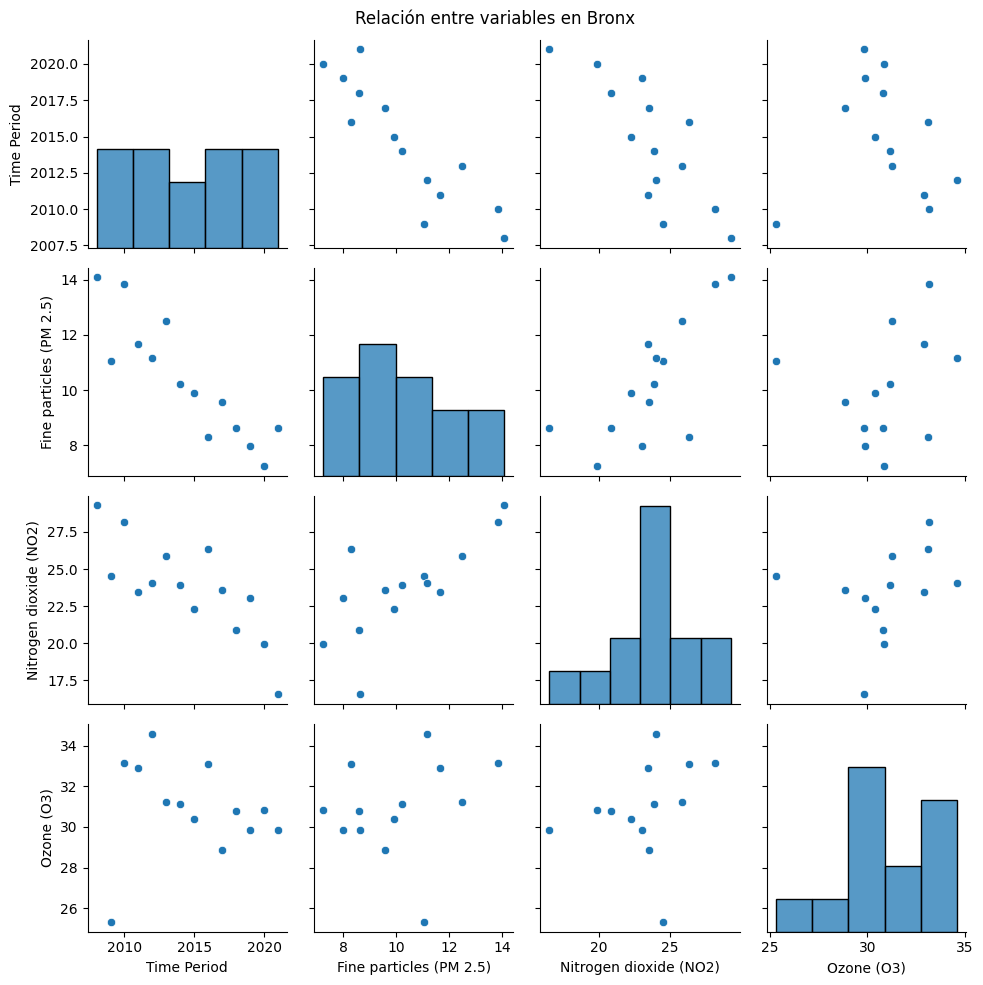

In [78]:
sns.pairplot(df_bronx_grouped)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre variables en Bronx')
plt.show()

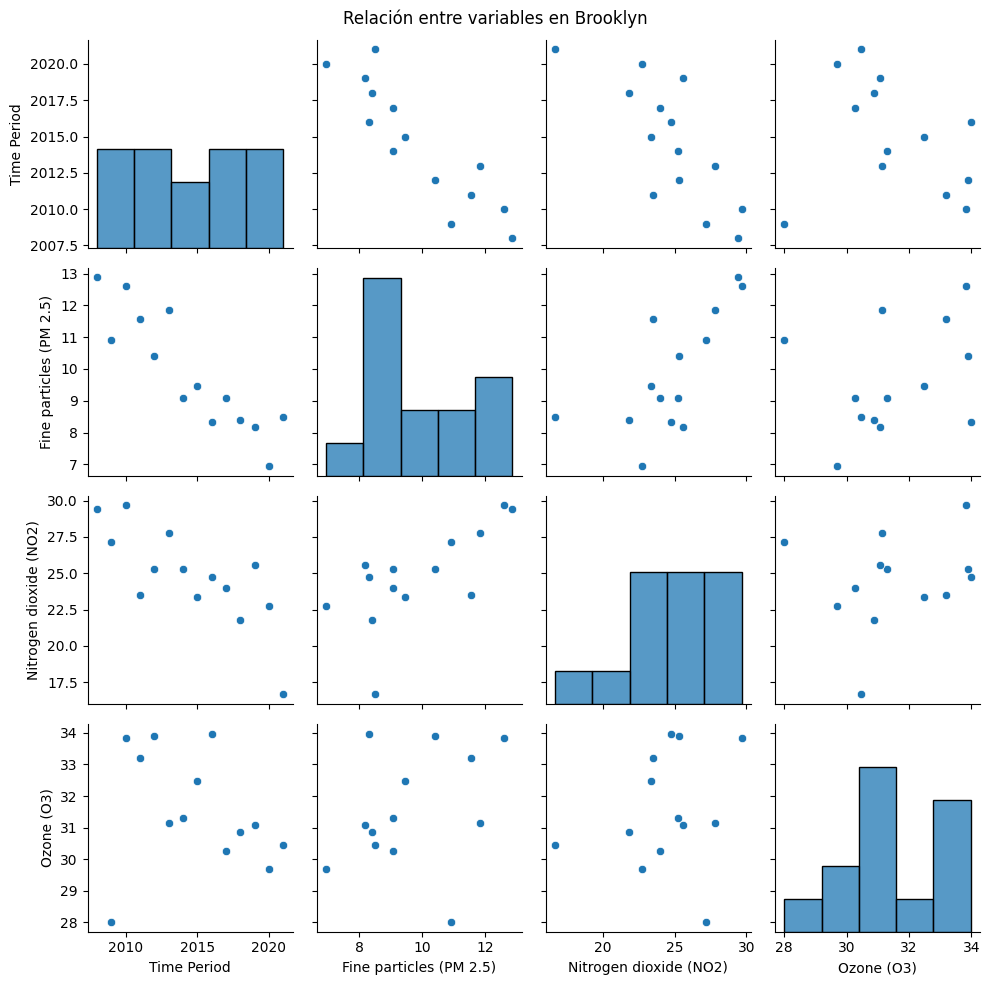

In [79]:
sns.pairplot(df_brooklyn_grouped)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre variables en Brooklyn')
plt.show()

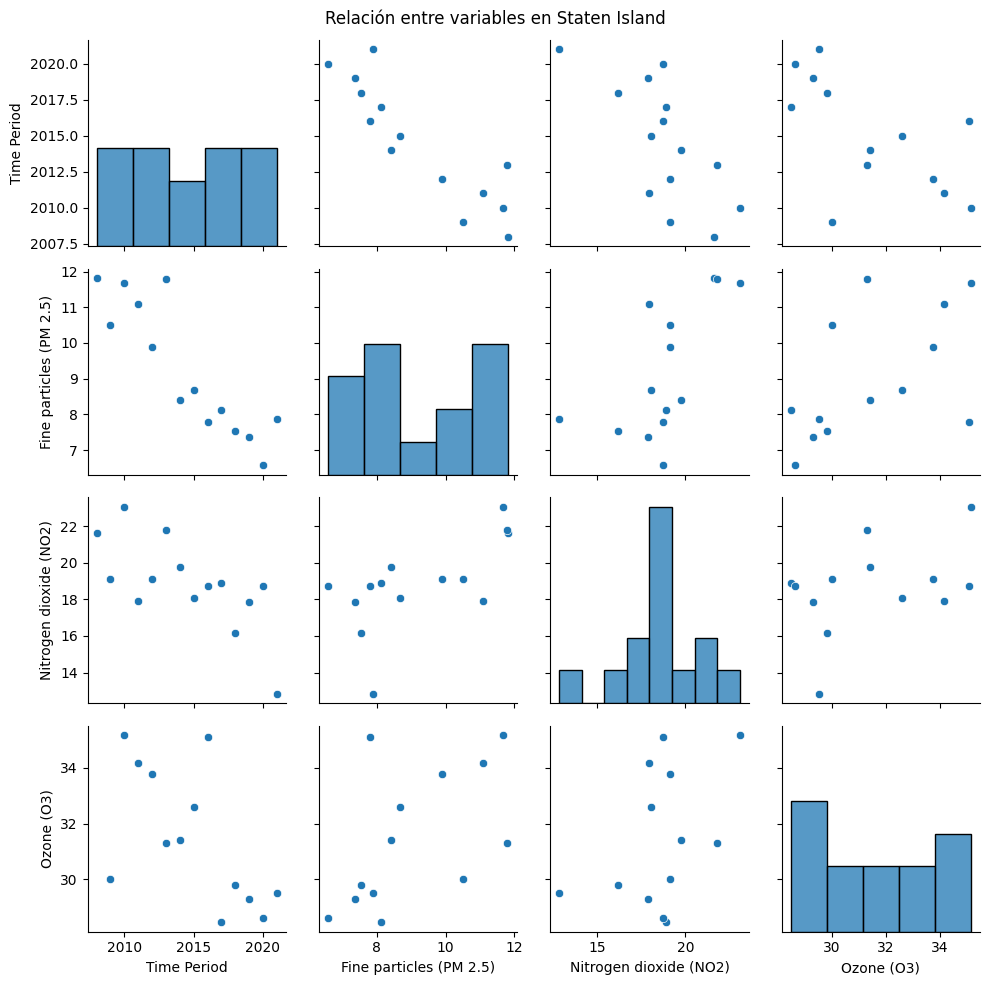

In [80]:
sns.pairplot(df_staten_grouped)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre variables en Staten Island')
plt.show()

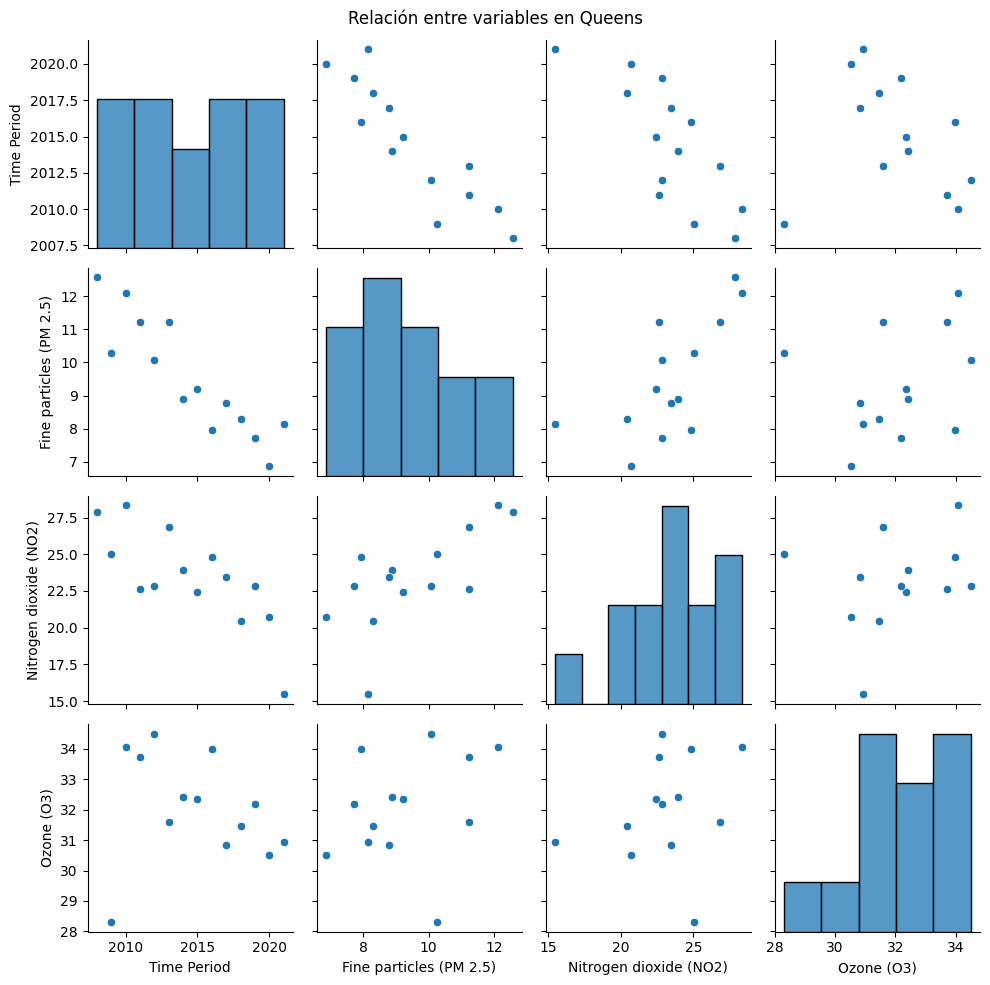

In [81]:
sns.pairplot(df_queens_grouped)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre variables en Queens')
plt.show()

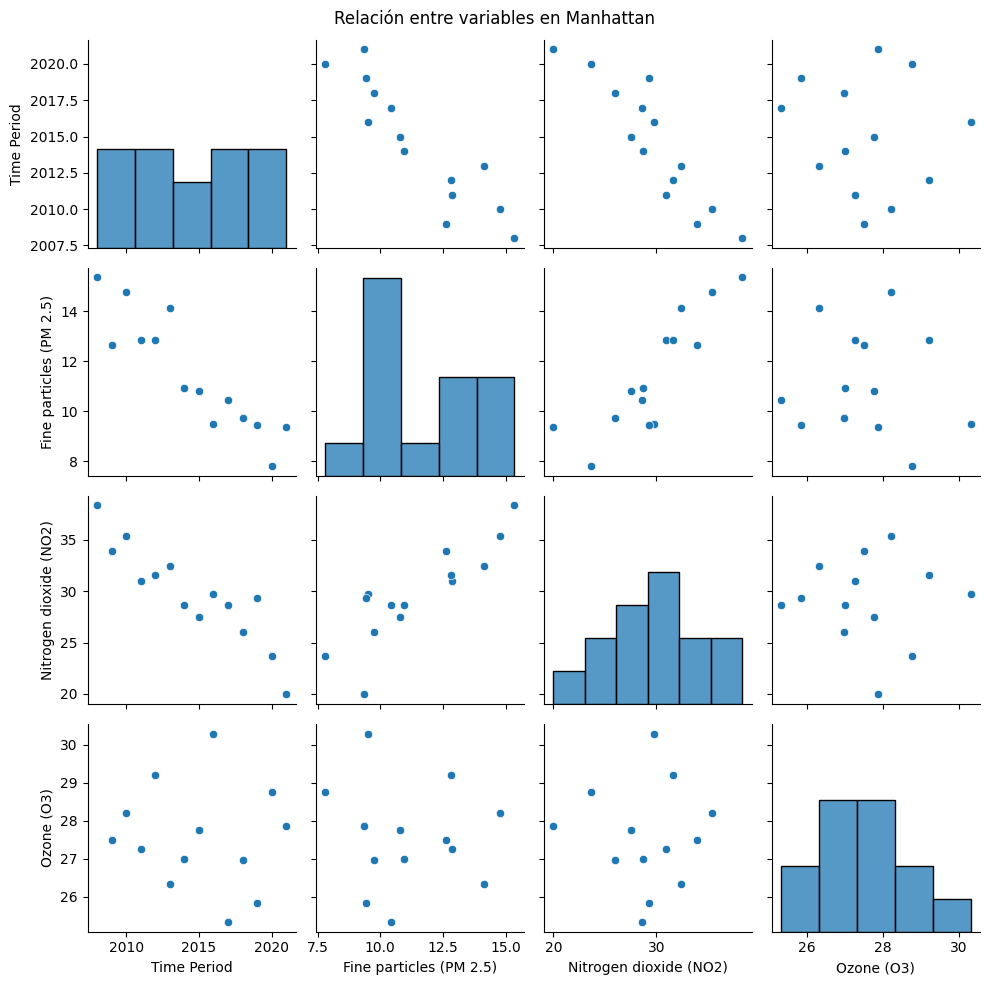

In [82]:
sns.pairplot(df_manhattan_grouped)
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.suptitle('Relación entre variables en Manhattan')
plt.show()

Como vemos en todos los Boroughs, ozono no tiene una buena correlación con el resto. Sin embargo NO2 y PM2.5 sí muestran una relación bastante lineal.

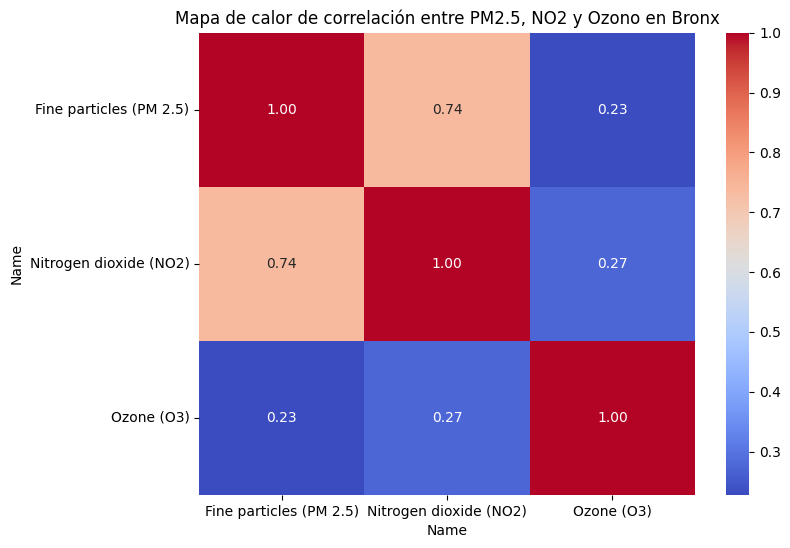

In [83]:
correlation_matrix = df_bronx_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5, NO2 y Ozono en Bronx')
plt.show()

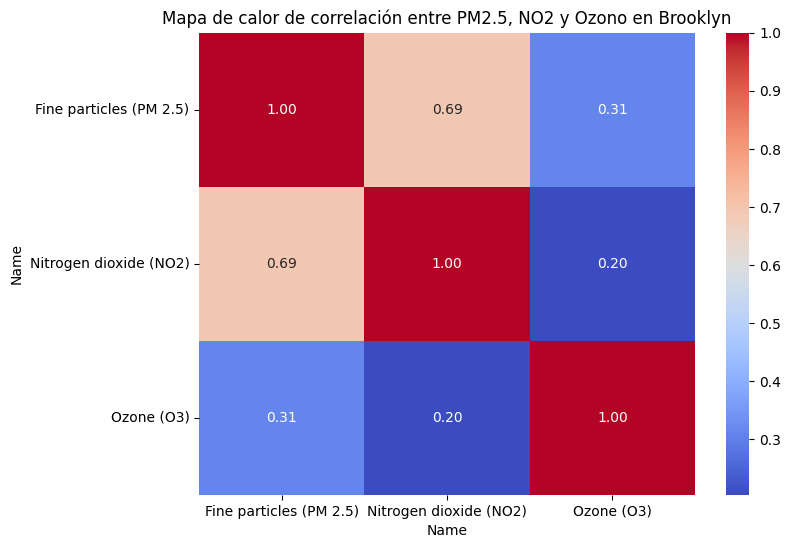

In [84]:
correlation_matrix = df_brooklyn_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5, NO2 y Ozono en Brooklyn')
plt.show()

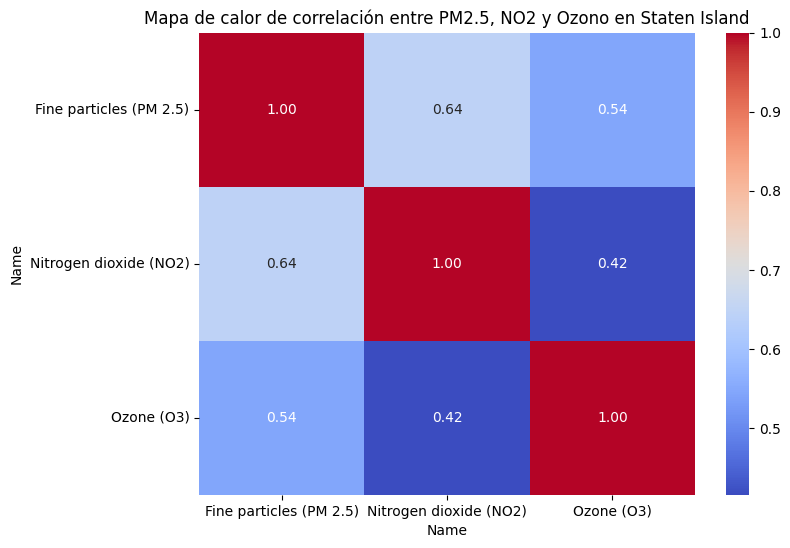

In [85]:
correlation_matrix = df_staten_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5, NO2 y Ozono en Staten Island')
plt.show()

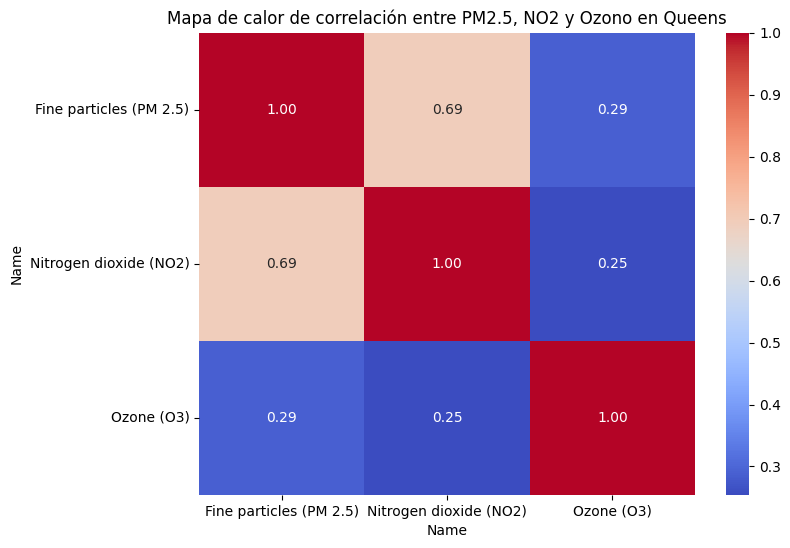

In [86]:
correlation_matrix = df_queens_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5, NO2 y Ozono en Queens')
plt.show()

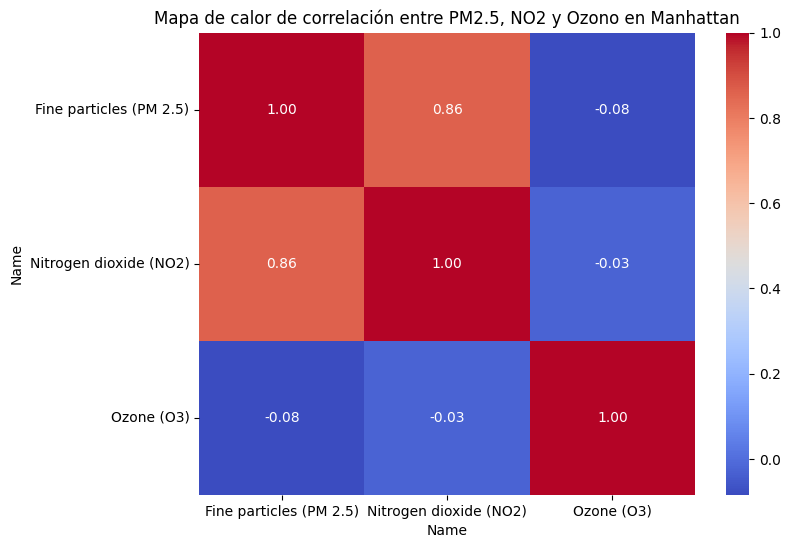

In [87]:
correlation_matrix = df_manhattan_grouped[['Fine particles (PM 2.5)', 'Nitrogen dioxide (NO2)', 'Ozone (O3)']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de calor de correlación entre PM2.5, NO2 y Ozono en Manhattan')
plt.show()

En los mapas de calor anteriores, podemos ver una gran correlación entre PM2.5 y NO2, y prácticamente ausencia de correlación entre O3 y el resto